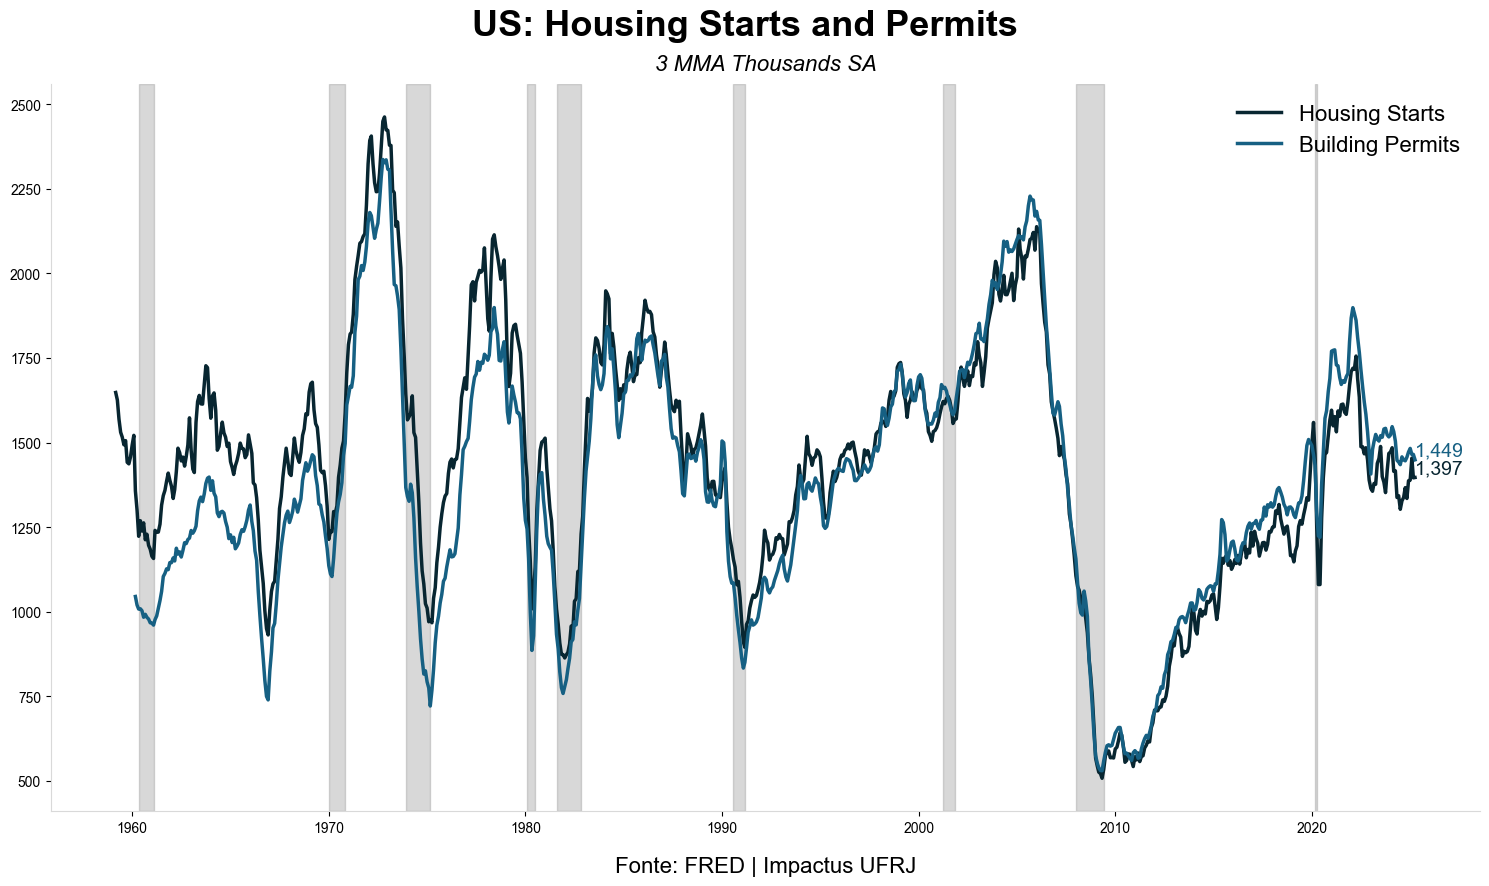

In [32]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

houst = fred.get_series("HOUST")
housing = pd.DataFrame()
housing["Housing Starts"] = pd.DataFrame(houst)
housing["Housing Starts 3 MMA"] = housing["Housing Starts"].rolling(window=3).mean()

permit = fred.get_series("PERMIT")
housing["Building Permits"] = pd.DataFrame(permit)
housing["Building Permits 3 MMA"] = housing["Building Permits"].rolling(window=3).mean()


plt.rcParams['font.family'] = 'Arial'

r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample('MS').first()
recessao_mensal = recessao_mensal.tail(len(housing))
index2 = housing.index

fig, ax = plt.subplots(figsize=(15,9))

indc = housing.index

ax.plot(indc, housing["Housing Starts 3 MMA"], linewidth=2.5, color="#082631", label="Housing Starts")
ax.plot(indc, housing["Building Permits 3 MMA"], linewidth=2.5, color="#166083", label="Building Permits")
ax.fill_between(recessao_mensal.index, 0, 1, where=recessao_mensal["USRECD"] == 1, color='gray', alpha=0.3, transform=ax.get_xaxis_transform())

for column, color in zip(["Housing Starts 3 MMA", "Building Permits 3 MMA"], ["#082631", "#166083"]):
    ax.text(indc[-1], housing[column].iloc[-1], f"{housing[column].iloc[-1]:,.0f}",
            fontsize=14, color=color, verticalalignment='bottom', horizontalalignment='left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d9d9d9')
ax.spines['bottom'].set_color('#d9d9d9')
ax.xaxis.grid(False)


ax.set_title("3 MMA Thousands SA", fontsize=16, style='italic', pad=10)
fig.suptitle("US: Housing Starts and Permits", fontweight="bold", fontsize=26)
ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=16, labelpad=15)
ax.legend(frameon=False, loc='upper right', fontsize= 16)

plt.tight_layout()
plt.show()



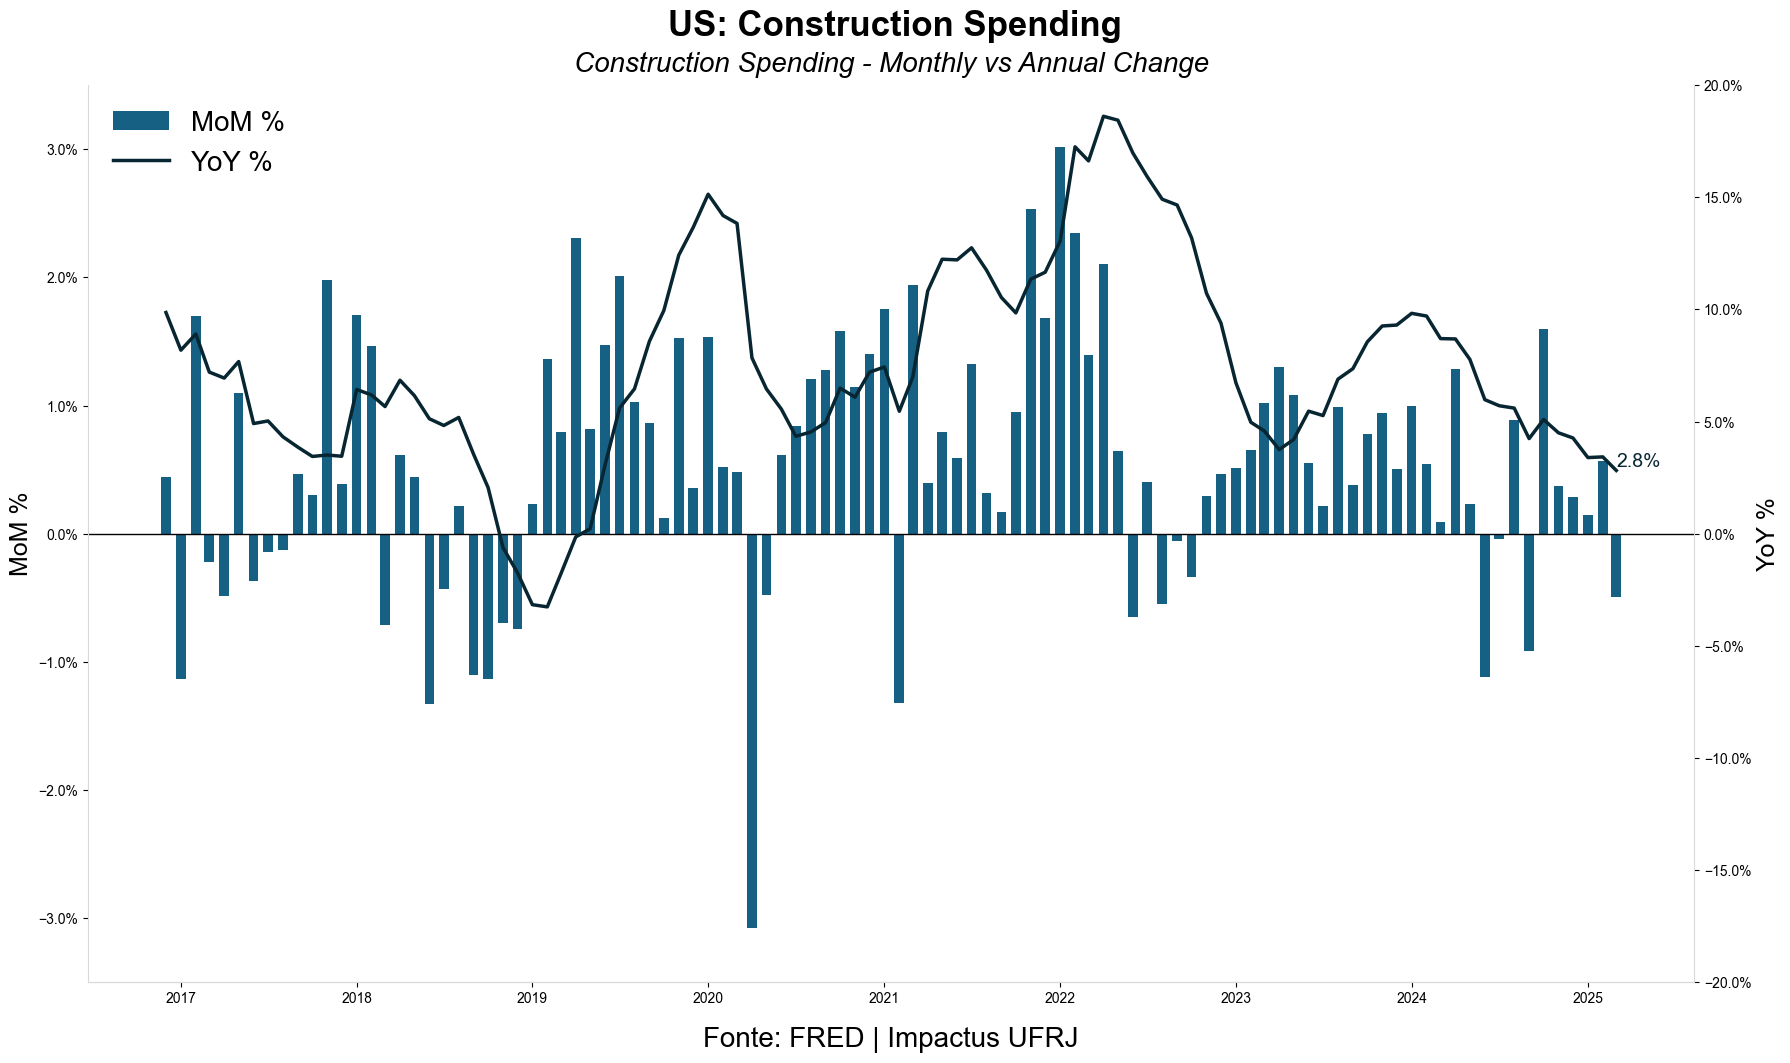

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
from fredapi import Fred

cs = fred.get_series("TTLCONS")
construction_spending = pd.DataFrame()
construction_spending["Construction Spending"] = pd.DataFrame(cs)
construction_spending["MoM %"] = construction_spending["Construction Spending"].pct_change()
construction_spending["YoY %"] = construction_spending["Construction Spending"].pct_change(periods=12)
construction_spending = construction_spending.tail(100)

fig, ax1 = plt.subplots(figsize=(18, 10.8))

indc = construction_spending.index

ax1.bar(indc, construction_spending["MoM %"], color="#166083", label="MoM %", width=20)
ax1.axhline(0, color='black', linewidth=1)
ax1.set_ylim(-0.035, 0.035)
ax1.yaxis.set_major_formatter(PercentFormatter(1.0))
ax1.set_ylabel("MoM %", fontsize=18)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_color('#d9d9d9')
ax1.xaxis.grid(False)

ax2 = ax1.twinx()
ax2.plot(indc, construction_spending["YoY %"], color="#082631", linewidth=2.5, label="YoY %")
ax2.set_ylim(-0.2, 0.2)
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylabel("YoY %", fontsize=18)
ax2.text(indc[-1], construction_spending["YoY %"].iloc[-1],
         f"{construction_spending['YoY %'].iloc[-1]:.1%}",
         fontsize=14, color="#082631",
         verticalalignment='bottom', horizontalalignment='left')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('#d9d9d9')
ax2.spines['left'].set_color("#d9d9d9")
ax2.spines['bottom'].set_color('#d9d9d9')
ax2.xaxis.grid(False)

ax1.set_title("Construction Spending - Monthly vs Annual Change", fontsize=20, style='italic', pad=10)
fig.suptitle("US: Construction Spending", fontweight="bold", fontsize=25)
ax1.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=20, labelpad=15)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, frameon=False, loc='upper left', fontsize=20)

plt.tight_layout()
plt.show()



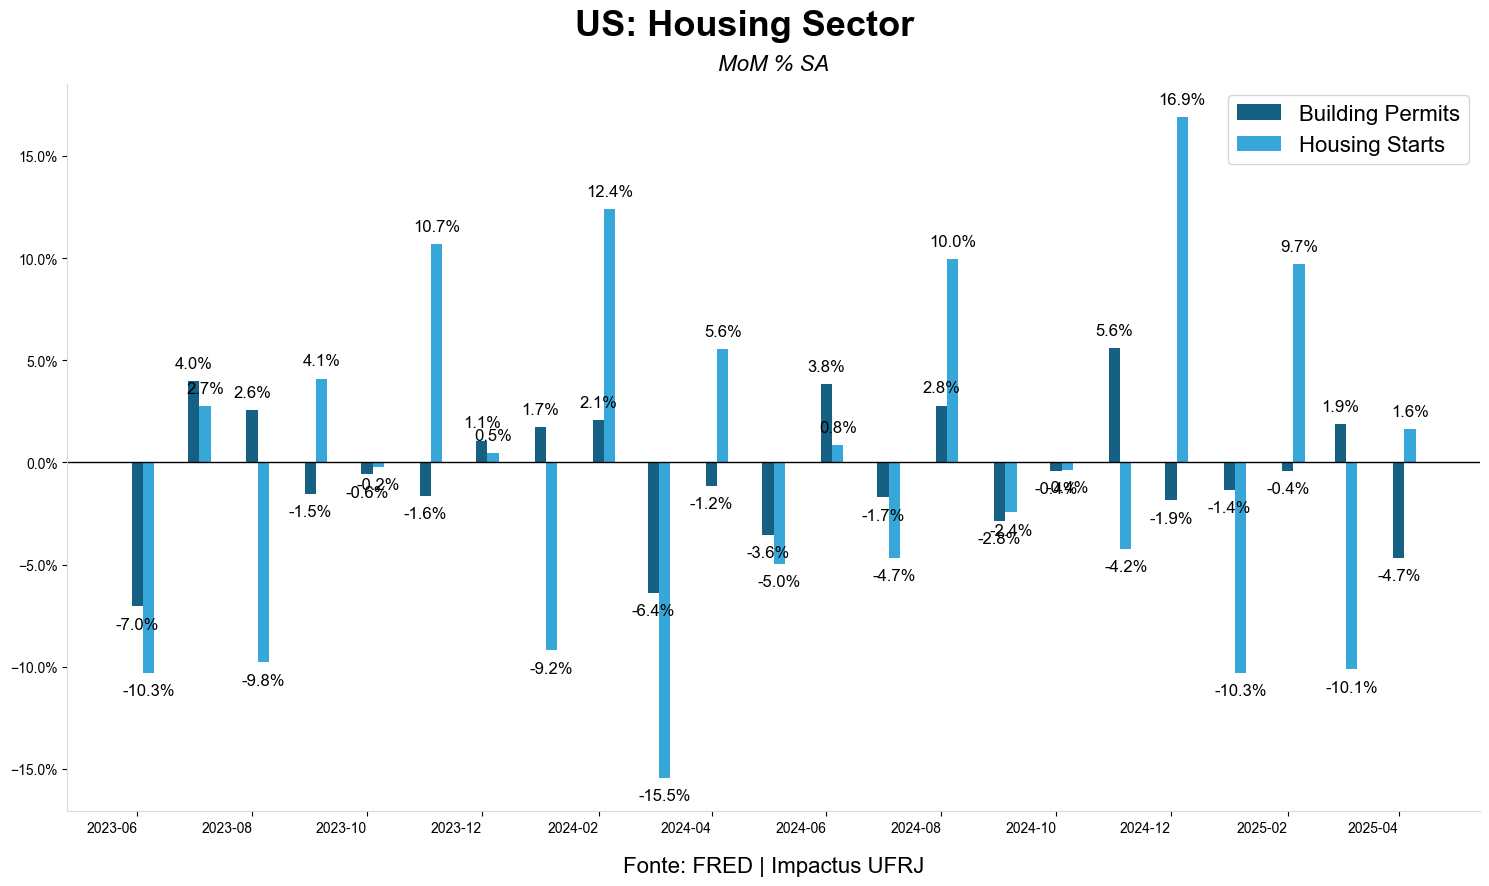

In [24]:
housing["BP %"] = housing["Building Permits"].pct_change()
housing["HS %"] = housing["Housing Starts"].pct_change()
fig, ax = plt.subplots(figsize=(15,9))

housing = housing.copy().tail(24)
x = housing.index
width = 6

bars2 = ax.bar(x, housing["BP %"], width=width, color="#166083", label="Building Permits")
bars3 = ax.bar(x + pd.Timedelta(days=width), housing["HS %"], width=width, color="#37A6D9", label="Housing Starts")

ax.axhline(0, color='black', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#d9d9d9')
ax.spines['bottom'].set_color('#d9d9d9')

ax.set_title("MoM % SA", fontsize=16, style='italic', pad=10)
fig.suptitle("US: Housing Sector", fontweight="bold", fontsize=26)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[2, 4, 6, 8, 10, 12]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=16, labelpad=15)
ax.legend(fontsize=16)

fig.autofmt_xdate(rotation=0)

# Função para adicionar os valores nas barras
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if not pd.isna(height):
            if height >= 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 0.005, 
                        f"{height:.1%}", ha='center', va='bottom', fontsize=12)
            else:
                ax.text(bar.get_x() + bar.get_width() / 2, height - 0.005, 
                        f"{height:.1%}", ha='center', va='top', fontsize=12)

# Adicionar rótulos para cada grupo de barras
add_labels(bars2)
add_labels(bars3)

plt.tight_layout()
plt.show()

